  observation_date  EXPGSC1
0       1947-01-01   93.767
1       1947-04-01   92.584
2       1947-07-01   87.885
3       1947-10-01   77.928
4       1948-01-01   74.373


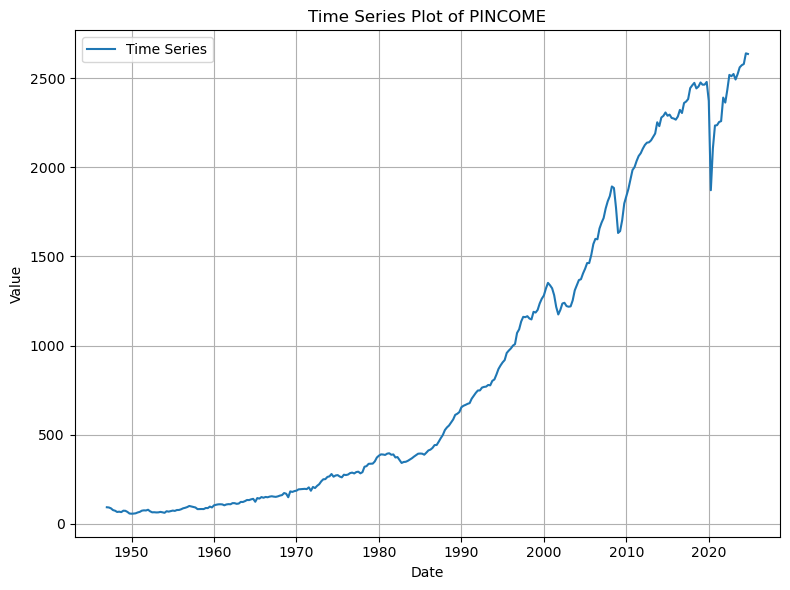

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("EXPGSC1.csv")

print(df.head())

# Convert 'DATE' to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Set 'DATE' as the index
df.set_index('observation_date', inplace=True)

# Plot the time series
plt.figure(figsize=(8, 6))
plt.plot(df['EXPGSC1'], label='Time Series')
plt.title('Time Series Plot of PINCOME')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

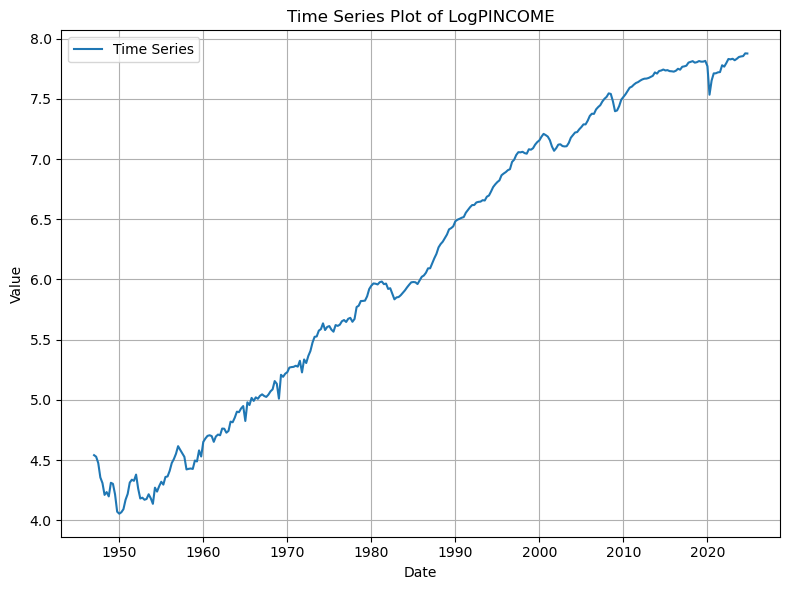

In [268]:
df['EXPGSC1'] = np.log(df['EXPGSC1'])
plt.figure(figsize=(8, 6))
plt.plot(df['EXPGSC1'], label='Time Series')
plt.title('Time Series Plot of LogPINCOME')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

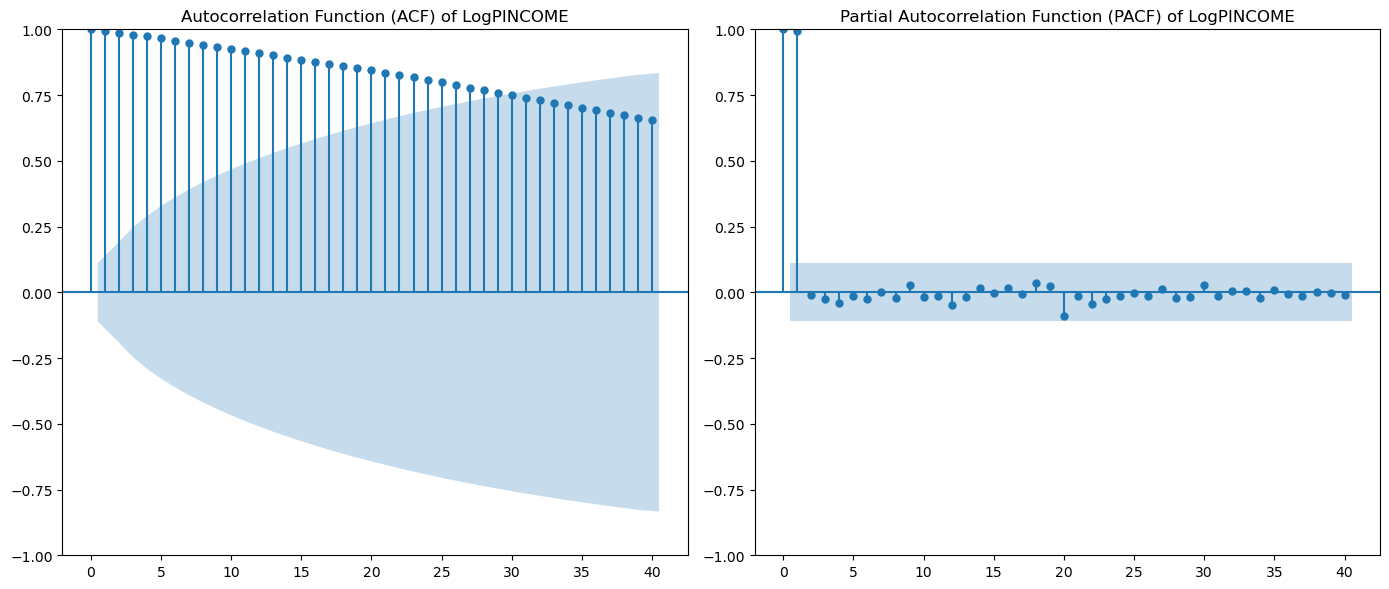

In [270]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts = df['EXPGSC1']
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(ts, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF) of LogPINCOME')

plt.subplot(1, 2, 2)
plot_pacf(ts, ax=plt.gca(), lags=40, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of LogPINCOME')

plt.tight_layout()
plt.show()

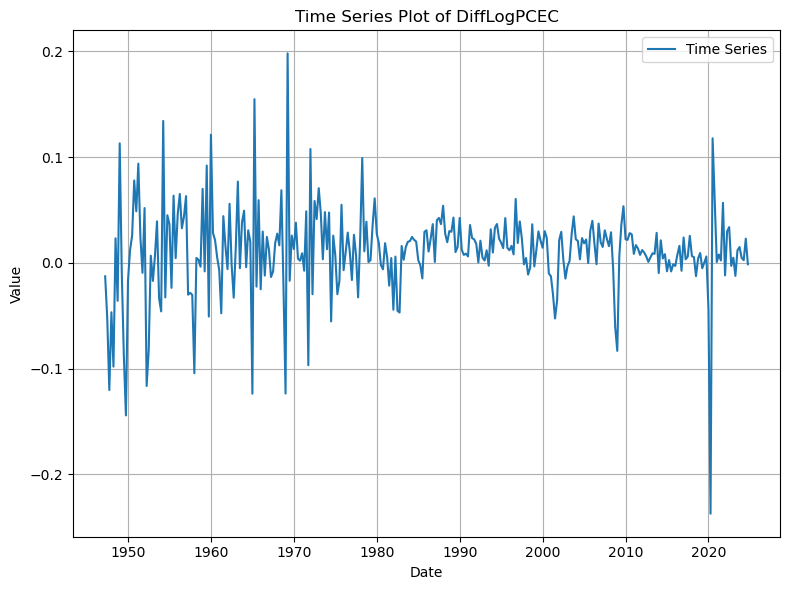

In [272]:
df['EXPGSC1'] = df['EXPGSC1'].diff()
df = df.dropna()
plt.figure(figsize=(8, 6))
plt.plot(df['EXPGSC1'], label='Time Series')
plt.title('Time Series Plot of DiffLogPCEC')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

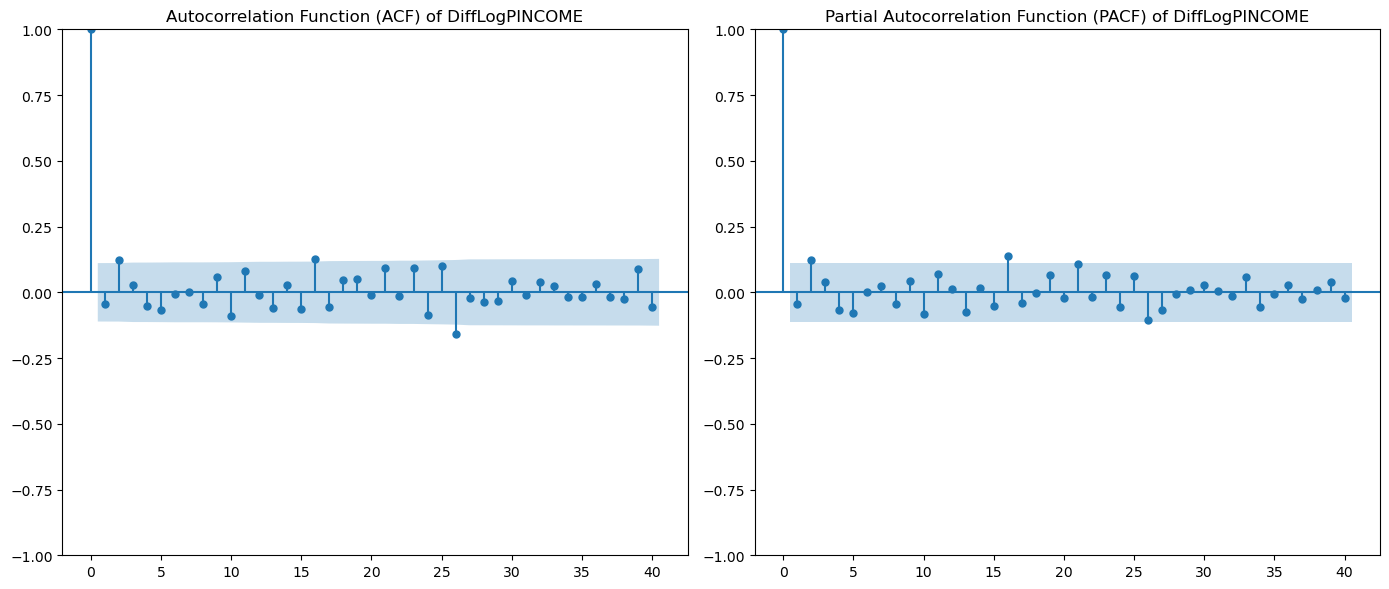

In [274]:
ts = df['EXPGSC1']
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(ts, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF) of DiffLogPINCOME')

plt.subplot(1, 2, 2)
plot_pacf(ts, ax=plt.gca(), lags=40, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of DiffLogPINCOME')

plt.tight_layout()
plt.show()

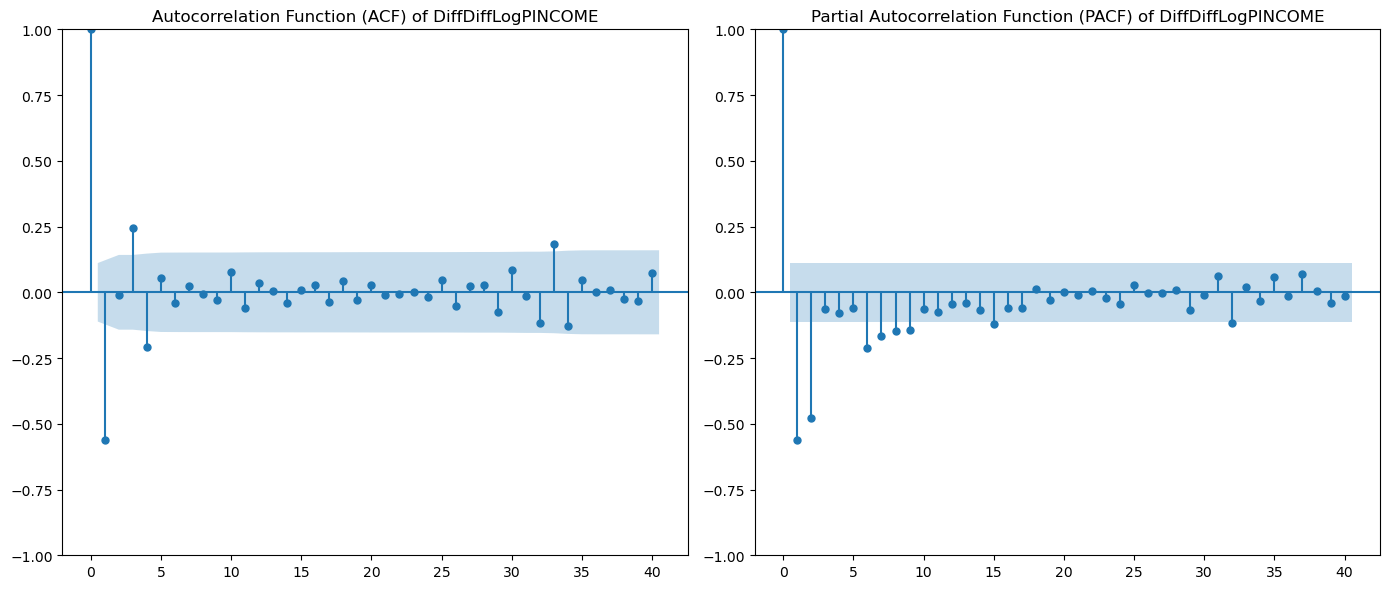

In [215]:
df['PINCOME'] = df['PINCOME'].diff()
df = df.dropna()

ts = df['PINCOME']
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(ts, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF) of DiffDiffLogPINCOME')

plt.subplot(1, 2, 2)
plot_pacf(ts, ax=plt.gca(), lags=40, method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of DiffDiffLogPINCOME')

plt.tight_layout()
plt.show()

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("PINCOME.csv")

df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

df['PINCOME'] = np.log(df['PINCOME'])
# Fit ARIMA(3,1,3) model
model = ARIMA(df, order=(3, 1, 3),trend = 'n')
result = model.fit()

# Coefficients
params = result.params

# Standard errors
stderr = result.bse

# t-values (z-values)
t_values = result.tvalues

# p-values
p_values = result.pvalues

summary_table = pd.DataFrame({
    'Coefficient': params,
    'Std. Error': stderr,
    't-value': t_values,
    'p-value': p_values
})
print(summary_table)


        Coefficient  Std. Error    t-value        p-value
ar.L1     -0.401054    0.118905  -3.372897   7.438181e-04
ar.L2      0.631868    0.107295   5.889079   3.883543e-09
ar.L3      0.762904    0.140490   5.430305   5.625772e-08
ma.L1      0.392681    0.132038   2.973998   2.939467e-03
ma.L2     -0.592964    0.125639  -4.719597   2.363120e-06
ma.L3     -0.582830    0.147068  -3.962994   7.401556e-05
sigma2     0.000149    0.000006  25.475417  3.692107e-143


In [226]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd

# Residuals from fitted ARIMA(3,1,3) model
residuals = result.resid

# Lags (same as Minitab: 12, 24, 36, 48)
lags = [12, 24, 36, 48]

# Compute Ljung-Box Q-statistics
ljungbox_result = acorr_ljungbox(residuals, lags=lags, return_df=True)

# Add Degrees of Freedom = lag - number of parameters estimated (3 AR + 3 MA = 6)
ljungbox_result["DF"] = [lag - 6 for lag in lags]

ljungbox_result = ljungbox_result.rename(columns={
    'lb_stat': 'Chi-Square',
    'lb_pvalue': 'P-Value'
})

# Reorder columns
ljungbox_result = ljungbox_result[['Chi-Square', 'DF', 'P-Value']]

# Format and display
print("Modified Box-Pierce (Ljung-Box) Chi-Square Statistic\n")
print(ljungbox_result)

Modified Box-Pierce (Ljung-Box) Chi-Square Statistic

    Chi-Square  DF  P-Value
12    0.105089   6      1.0
24    0.129230  18      1.0
36    0.152251  30      1.0
48    0.164433  42      1.0


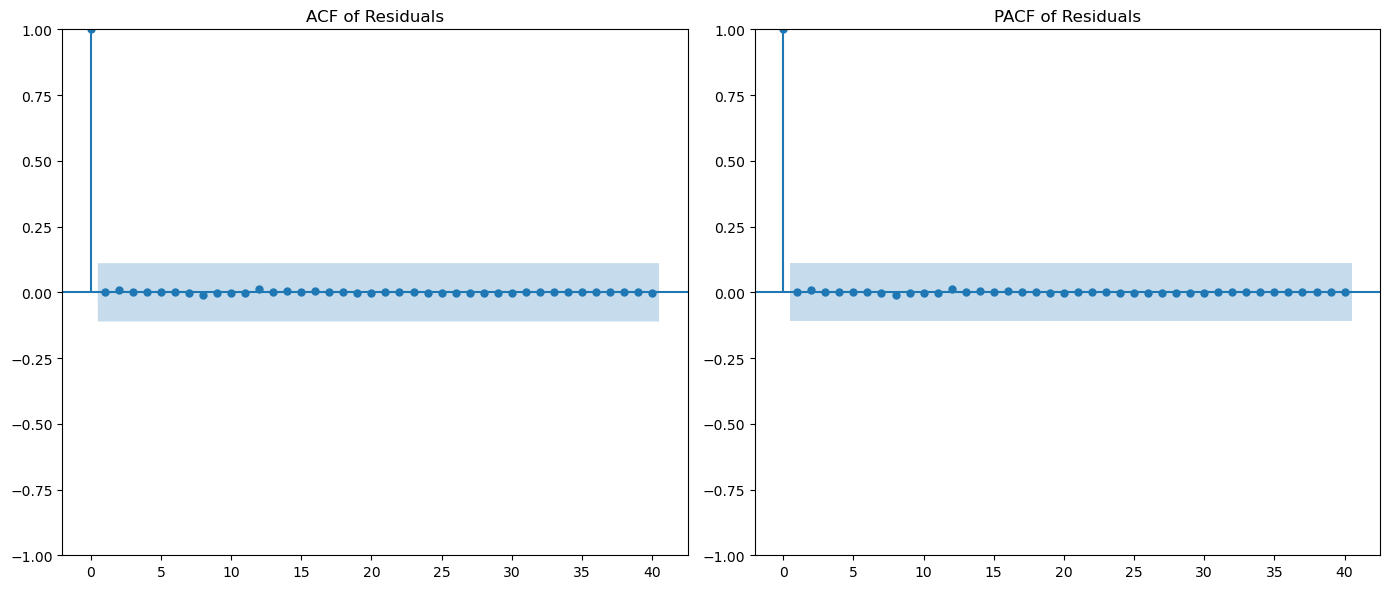

In [228]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Residuals')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF of Residuals')

plt.tight_layout()
plt.show()

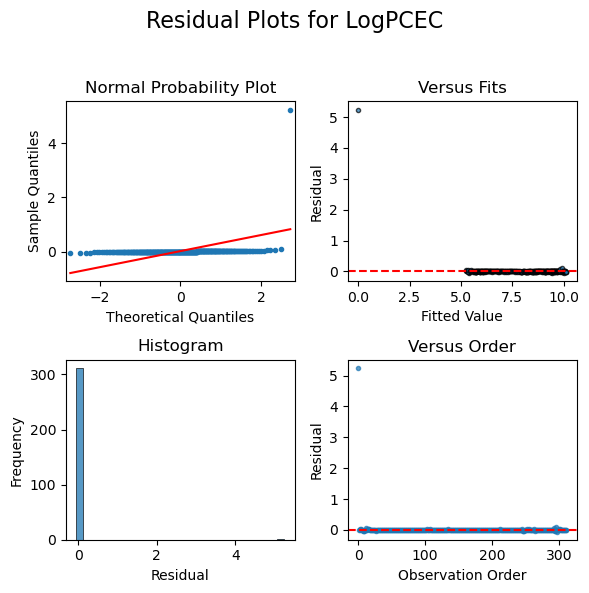

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Get residuals from fitted ARIMA model
residuals = result.resid
fitted = result.fittedvalues

# Create the 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
fig.suptitle('Residual Plots for LogPCEC', fontsize=16)

# 1. Normal Probability Plot (QQ Plot)
sm.qqplot(residuals, line='s', marker = '.', ax=axes[0, 0])
axes[0,0].set_title('Normal Probability Plot')
# 2. Residuals vs. Fitted Values
axes[0, 1].scatter(fitted, residuals, edgecolor='k', marker = '.', alpha=0.7)
axes[0, 1].axhline(0, color='red', linestyle='--')
axes[0, 1].set_title('Versus Fits')
axes[0, 1].set_xlabel('Fitted Value')
axes[0, 1].set_ylabel('Residual')

# 3. Histogram of Residuals
sns.histplot(residuals, bins=30, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Histogram')
axes[1, 0].set_xlabel('Residual')
axes[1, 0].set_ylabel('Frequency')

# 4. Residuals vs. Observation Order
axes[1, 1].plot(residuals.reset_index(drop=True),marker = '.',linestyle='', alpha=0.7)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title('Versus Order')
axes[1, 1].set_xlabel('Observation Order')
axes[1, 1].set_ylabel('Residual')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

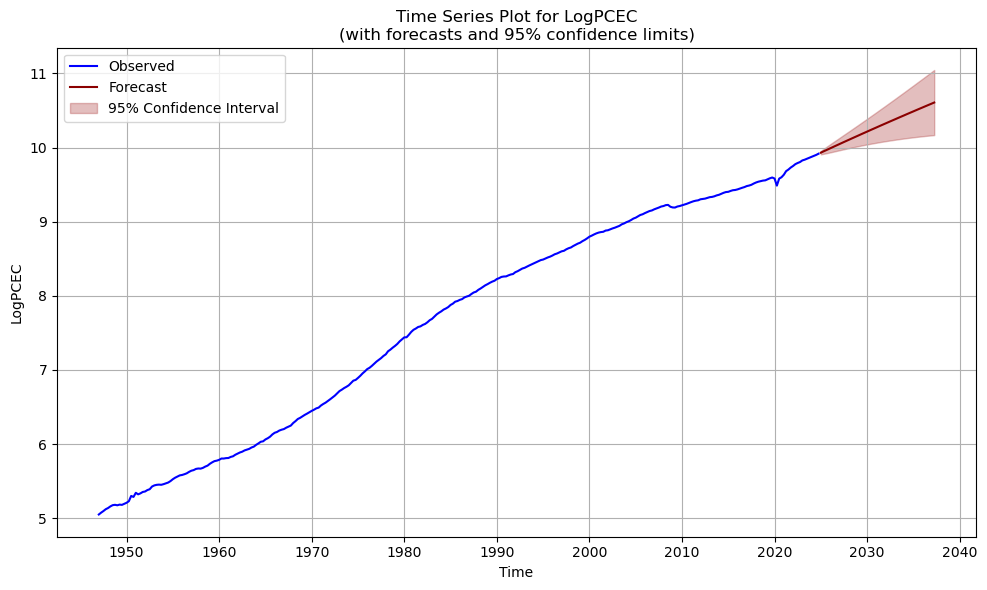

In [197]:
import matplotlib.pyplot as plt

# Forecast using ARIMA model fit on log-transformed data
forecast_result = result.get_forecast(steps=50)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot log-level forecast
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Observed', color='blue')  # historical log values
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='darkred')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='brown', alpha=0.3, label='95% Confidence Interval')

plt.title('Time Series Plot for LogPCEC\n(with forecasts and 95% confidence limits)')
plt.xlabel('Time')
plt.ylabel('LogPCEC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

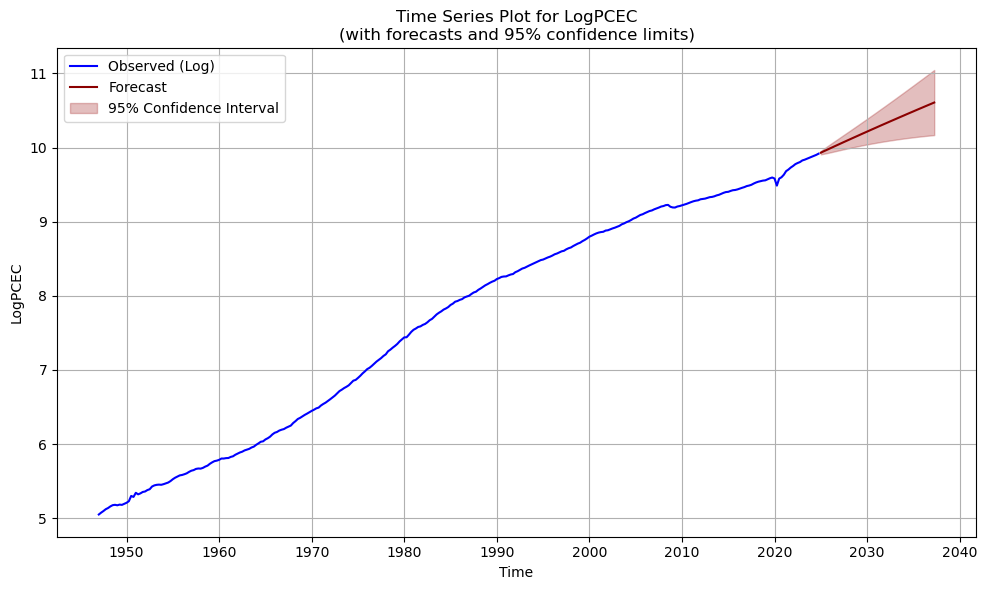

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Load and prepare data
df = pd.read_csv("PCEC_1.csv")
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

# Apply log first, then assign time series
df['PCEC'] = np.log(df['PCEC'])
ts = df['PCEC']

# Fit ARIMA(3,1,3) on logged data
model = ARIMA(ts, order=(3, 1, 3), trend='n')
result = model.fit()


# Forecast
forecast_result = result.get_forecast(steps=50)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot (in log scale)
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Observed (Log)', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='darkred')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='brown', alpha=0.3, label='95% Confidence Interval')

plt.title('Time Series Plot for LogPCEC\n(with forecasts and 95% confidence limits)')
plt.xlabel('Time')
plt.ylabel('LogPCEC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [187]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd

params = result.params

# Standard errors
stderr = result.bse

# t-values (z-values, since it's MLE)
t_values = result.tvalues

# p-values
p_values = result.pvalues

summary_table = pd.DataFrame({
    'Coefficient': params,
    'Std. Error': stderr,
    't-value': t_values,
    'p-value': p_values
})
print(summary_table)

# Residuals from your fitted ARIMA(3,1,3) model
residuals = result.resid

# Desired lags (same as Minitab: 12, 24, 36, 48)
lags = [12, 24, 36, 48]

# Compute Ljung-Box Q-statistics
ljungbox_result = acorr_ljungbox(residuals, lags=lags, return_df=True)

# Add Degrees of Freedom = lag - number of parameters estimated (3 AR + 3 MA = 6)
ljungbox_result["DF"] = [lag - 6 for lag in lags]

ljungbox_result = ljungbox_result.rename(columns={
    'lb_stat': 'Chi-Square',
    'lb_pvalue': 'P-Value'
})

# Reorder columns
ljungbox_result = ljungbox_result[['Chi-Square', 'DF', 'P-Value']]

# Format and display
print("Modified Box-Pierce (Ljung-Box) Chi-Square Statistic\n")
print(ljungbox_result)

        Coefficient  Std. Error    t-value   p-value
ar.L1     -0.193879    0.493947  -0.392510  0.694681
ar.L2      0.587322    0.274223   2.141771  0.032212
ar.L3      0.600941    0.289585   2.075179  0.037970
ma.L1      0.124984    0.496751   0.251603  0.801348
ma.L2     -0.438621    0.311064  -1.410069  0.158519
ma.L3     -0.489489    0.229505  -2.132802  0.032941
sigma2     0.000135    0.000003  46.120282  0.000000
Modified Box-Pierce (Ljung-Box) Chi-Square Statistic

    Chi-Square  DF  P-Value
12    0.025769   6      1.0
24    0.106596  18      1.0
36    0.121260  30      1.0
48    0.131333  42      1.0


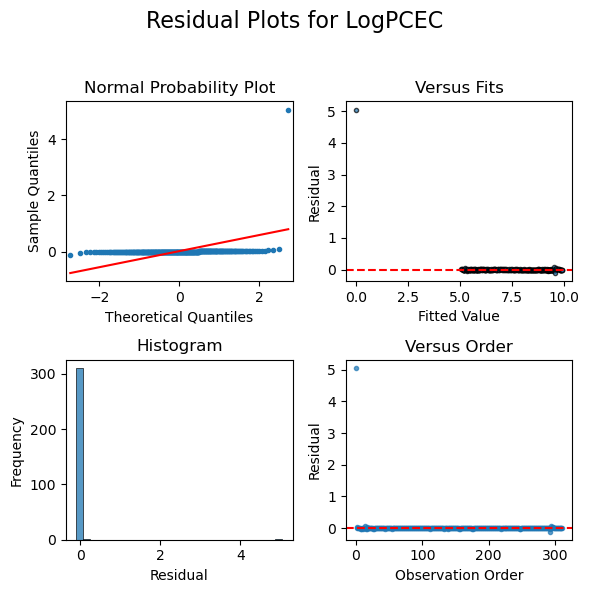

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Get residuals from fitted ARIMA model
residuals = result.resid
fitted = result.fittedvalues

# Create the 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
fig.suptitle('Residual Plots for LogPCEC', fontsize=16)

# 1. Normal Probability Plot (QQ Plot)
sm.qqplot(residuals, line='s', marker = '.', ax=axes[0, 0])
axes[0,0].set_title('Normal Probability Plot')
# 2. Residuals vs. Fitted Values
axes[0, 1].scatter(fitted, residuals, edgecolor='k', marker = '.', alpha=0.7)
axes[0, 1].axhline(0, color='red', linestyle='--')
axes[0, 1].set_title('Versus Fits')
axes[0, 1].set_xlabel('Fitted Value')
axes[0, 1].set_ylabel('Residual')

# 3. Histogram of Residuals
sns.histplot(residuals, bins=30, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Histogram')
axes[1, 0].set_xlabel('Residual')
axes[1, 0].set_ylabel('Frequency')

# 4. Residuals vs. Observation Order
axes[1, 1].plot(residuals.reset_index(drop=True),marker = '.',linestyle='', alpha=0.7)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title('Versus Order')
axes[1, 1].set_xlabel('Observation Order')
axes[1, 1].set_ylabel('Residual')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()